<a href="https://colab.research.google.com/drive/1-FtHfunrsygpWBbY8ngvrXWxian0vUeM#scrollTo=4DjRyjaJuVST" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importando as Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Conectando o Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Carregando o arquivo Excel
excel_file = pd.ExcelFile('/content/drive/MyDrive/data_sets/futebol/stats.xlsx')

# Obtendo os nomes de todas as abas
sheet_names = excel_file.sheet_names

# Exibindo os nomes das abas
for sheet_name in sheet_names:
    print(sheet_name)

Stats


In [4]:
#Selecionando a aba correta
data =  pd.read_excel('/content/drive/MyDrive/data_sets/futebol/stats.xlsx', sheet_name='Stats')

In [5]:
data.head()


,Cl,Equipe,Em casa MP,Em casa V,Em casa E,Em casa D,Em casa GP,Em casa GC,Em casa GD,Em casa Pt,...,Visitante D,Visitante GP,Visitante GC,Visitante GD,Visitante Pt,Visitante Pts/PPJ,Visitante xG,Visitante xGA,Visitante xGD,Visitante xGD/90
0,1,Botafogo,4,4,0,0,8,1,7,12,...,1,6,5,1,6,2.00,36,59,-22,-0.75
1,2,Palmeiras,4,3,1,0,9,4,5,10,...,0,7,2,5,5,1.67,33,28,5,0.16
2,3,Fluminense,3,2,1,0,5,1,4,7,...,2,7,5,2,6,1.50,67,101,-34,-0.85
3,4,Atlético Mineiro,3,2,0,1,5,3,2,6,...,1,6,3,3,7,1.75,59,42,17,0.42
4,5,Cruzeiro,4,2,0,2,3,4,-1,6,...,1,8,2,6,6,2.00,53,43,10,0.32


In [18]:
#Criar a nova coluna somando dos gols pro e contra
data['totalgp'] = data['Em casa GP'] + data['Visitante GP']
data['totalgc'] = data['Em casa GC'] + data['Visitante GC']
data.head()

,Cl,Equipe,Em casa MP,Em casa V,Em casa E,Em casa D,Em casa GP,Em casa GC,Em casa GD,Em casa Pt,...,Visitante GD,Visitante Pt,Visitante Pts/PPJ,Visitante xG,Visitante xGA,Visitante xGD,Visitante xGD/90,totalgp,totalgc,saldo
0,1,Botafogo,4,4,0,0,8,1,7,12,...,1,6,2.00,36,59,-22,-0.75,14,6,8
1,2,Palmeiras,4,3,1,0,9,4,5,10,...,5,5,1.67,33,28,5,0.16,16,6,10
2,3,Fluminense,3,2,1,0,5,1,4,7,...,2,6,1.50,67,101,-34,-0.85,12,6,6
3,4,Atlético Mineiro,3,2,0,1,5,3,2,6,...,3,7,1.75,59,42,17,0.42,11,6,5
4,5,Cruzeiro,4,2,0,2,3,4,-1,6,...,6,6,2.00,53,43,10,0.32,11,6,5


In [7]:
stats = data[['Equipe', 'totalgp', 'totalgc']]
print(stats)

              Equipe  totalgp  totalgc
0           Botafogo       14        6
1          Palmeiras       16        6
2         Fluminense       12        6
3   Atlético Mineiro       11        6
4           Cruzeiro       11        6
5           Flamengo       13        9
6          Athletico       10        9
7          São Paulo       12        6
8             Santos        8        5
9             Gremio       10       10
10         Fortaleza       10        6
11        Bragantino       11       11
12             Bahia        9       12
13            Cuiabá        6       12
14     Internacional        5       11
15             Goiás        6       13
16     Vasco da Gama        8       11
17       Corinthians        6       12
18   América Mineiro        7       18
19          Coritiba        6       16


In [8]:
data['saldo'] = data['totalgp'] - data['totalgc']
data.head()

,Cl,Equipe,Em casa MP,Em casa V,Em casa E,Em casa D,Em casa GP,Em casa GC,Em casa GD,Em casa Pt,...,Visitante GD,Visitante Pt,Visitante Pts/PPJ,Visitante xG,Visitante xGA,Visitante xGD,Visitante xGD/90,totalgp,totalgc,saldo
0,1,Botafogo,4,4,0,0,8,1,7,12,...,1,6,2.00,36,59,-22,-0.75,14,6,8
1,2,Palmeiras,4,3,1,0,9,4,5,10,...,5,5,1.67,33,28,5,0.16,16,6,10
2,3,Fluminense,3,2,1,0,5,1,4,7,...,2,6,1.50,67,101,-34,-0.85,12,6,6
3,4,Atlético Mineiro,3,2,0,1,5,3,2,6,...,3,7,1.75,59,42,17,0.42,11,6,5
4,5,Cruzeiro,4,2,0,2,3,4,-1,6,...,6,6,2.00,53,43,10,0.32,11,6,5


In [27]:
#Gerando os Dfs para os gráficos 
gp = data.groupby('Equipe')['totalgp'].sum()
gc = data.groupby('Equipe')['totalgc'].sum()
gt = data.groupby('Equipe')['saldo'].sum()

In [28]:
#Classificando do maior para o menor saldo
gp = gp.sort_values(ascending=False)
gc = gc.sort_values(ascending=False)
gt = gt.sort_values(ascending=False)

In [11]:
!pip install mplcyberpunk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
#Carregar as imagens dos brasões dos times
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import mplcyberpunk
brasoes = [] 
for equipe in gp.index:
    img = Image.open(f'/content/drive/MyDrive/data_sets/futebol/scatter_plot/images_br/{equipe}.png')  
    brasoes.append(img)



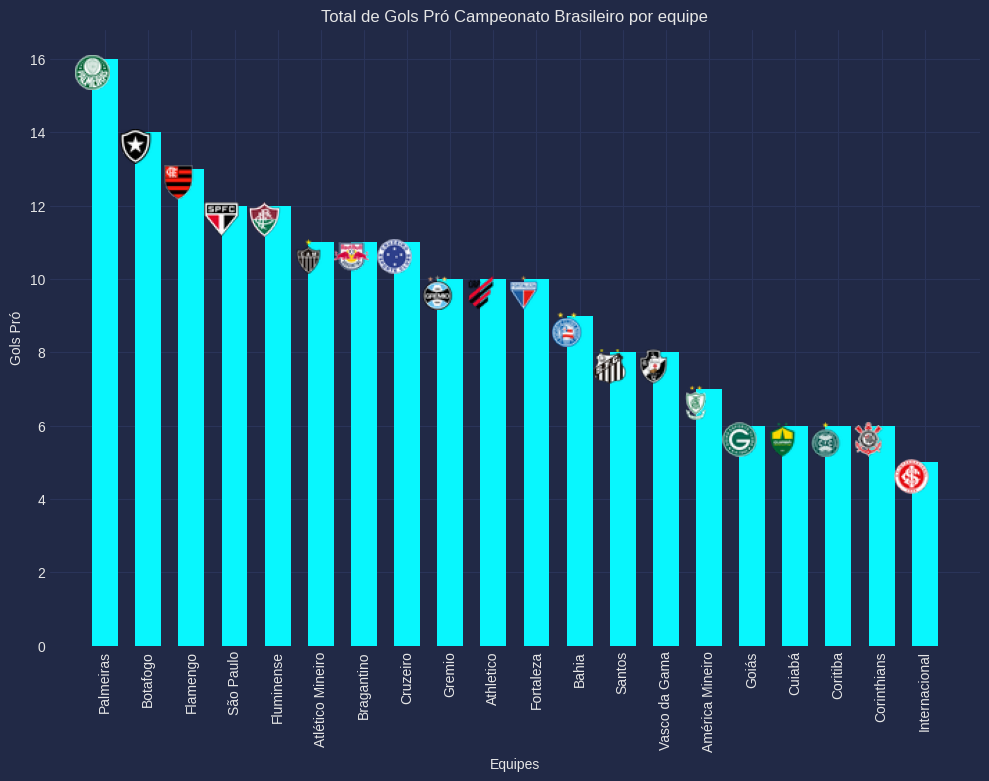

In [14]:
#Definir o tamanho dos brasões dos times
brasao_height = 25  # Altura do brasão (ajuste conforme necessário)
bar_width = 0.6  # Largura das barras (ajuste conforme necessário)
vertical_offset = 5 # Deslocamento vertical das imagens (ajuste conforme necessário)

#Plotar o gráfico de barras com as imagens dos brasões
plt.style.use("cyberpunk")

# Ajustar o tamanho da figura do gráfico
plt.figure(figsize=(12, 8))  # Ajuste os valores de largura e altura conforme necessário

# Gerar o gráfico de barras com os dados das substituições
bars = plt.bar(gp.index, gp.values, width=bar_width)

for i, value in enumerate(data.values):
    img = brasoes[i].resize((brasao_height, brasao_height), Image.ANTIALIAS)  # Redimensionar a imagem para o tamanho desejado
    bar = bars[i]
    bar_x = bar.get_x()
    bar_y = bar.get_height()
    imagebox = OffsetImage(img, zoom=1)
    ab = AnnotationBbox(imagebox, (bar_x, bar_y), frameon=False, xybox=(0, -10), xycoords='data', boxcoords="offset points", pad=0)
    plt.gca().add_artist(ab)

# Adicionar rótulos aos eixos
plt.xlabel('Equipes')
plt.ylabel('Gols Pró')

# Adicionar título ao gráfico
plt.title('Total de Gols Pró Campeonato Brasileiro por equipe')

# Rotacionar os rótulos dos eixos (opcional)
plt.xticks(rotation=90)  # Ajuste o ângulo de rotação conforme necessário

# Exibir o gráfico
plt.show()


In [34]:
#Carregar as imagens dos brasões dos times
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import mplcyberpunk
brasoes = [] 
for equipe in gc.index:
    img = Image.open(f'/content/drive/MyDrive/data_sets/futebol/scatter_plot/images_br/{equipe}.png')  
    brasoes.append(img)


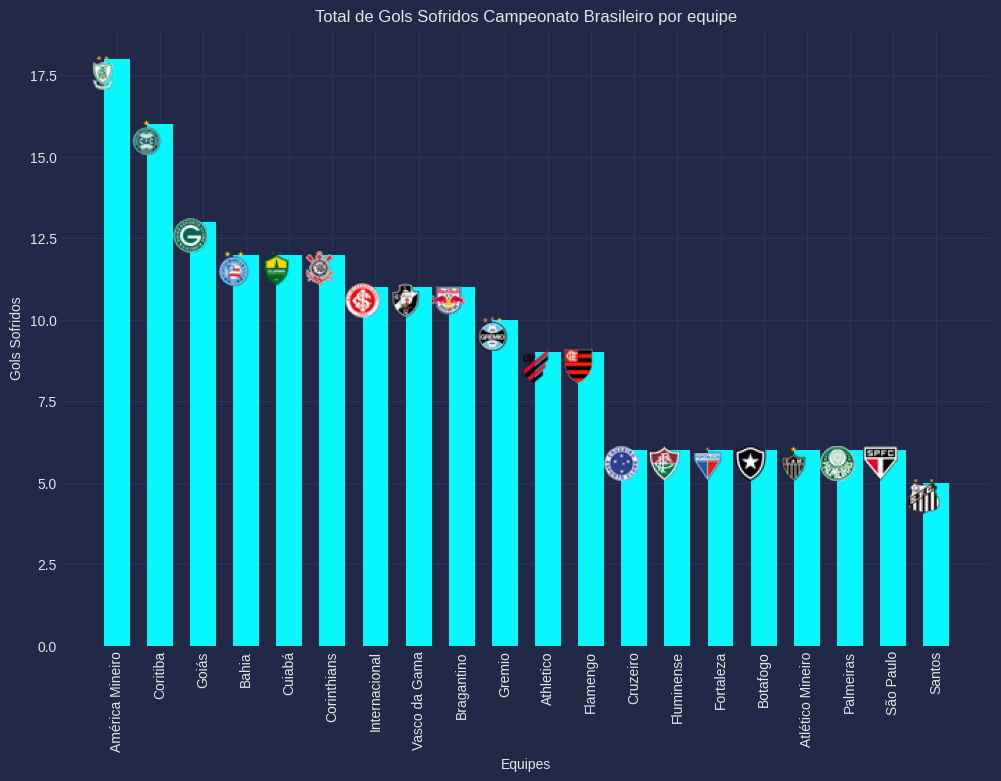

In [35]:
#Definir o tamanho dos brasões dos times
brasao_height = 25  # Altura do brasão (ajuste conforme necessário)
bar_width = 0.6  # Largura das barras (ajuste conforme necessário)
vertical_offset = 5 # Deslocamento vertical das imagens (ajuste conforme necessário)

#Plotar o gráfico de barras com as imagens dos brasões
plt.style.use("cyberpunk")

# Ajustar o tamanho da figura do gráfico
plt.figure(figsize=(12, 8))  # Ajuste os valores de largura e altura conforme necessário

# Gerar o gráfico de barras com os dados das substituições
bars2 = plt.bar(gc.index, gc.values, width=bar_width)

for i, value in enumerate(gc.values):
    img = brasoes[i].resize((brasao_height, brasao_height), Image.ANTIALIAS)  # Redimensionar a imagem para o tamanho desejado
    bar = bars2[i]
    bar_x = bar.get_x()
    bar_y = bar.get_height()
    imagebox = OffsetImage(img, zoom=1)
    ab = AnnotationBbox(imagebox, (bar_x, bar_y), frameon=False, xybox=(0, -10), xycoords='data', boxcoords="offset points", pad=0)
    plt.gca().add_artist(ab)

# Adicionar rótulos aos eixos
plt.xlabel('Equipes')
plt.ylabel('Gols Sofridos')

# Adicionar título ao gráfico
plt.title('Total de Gols Sofridos Campeonato Brasileiro por equipe')

# Rotacionar os rótulos dos eixos (opcional)
plt.xticks(rotation=90)  # Ajuste o ângulo de rotação conforme necessário

# Exibir o gráfico
plt.show()


In [36]:
#Carregar as imagens dos brasões dos times
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import mplcyberpunk
brasoes = [] 
for equipe in gt.index:
    img = Image.open(f'/content/drive/MyDrive/data_sets/futebol/scatter_plot/images_br/{equipe}.png')  
    brasoes.append(img)

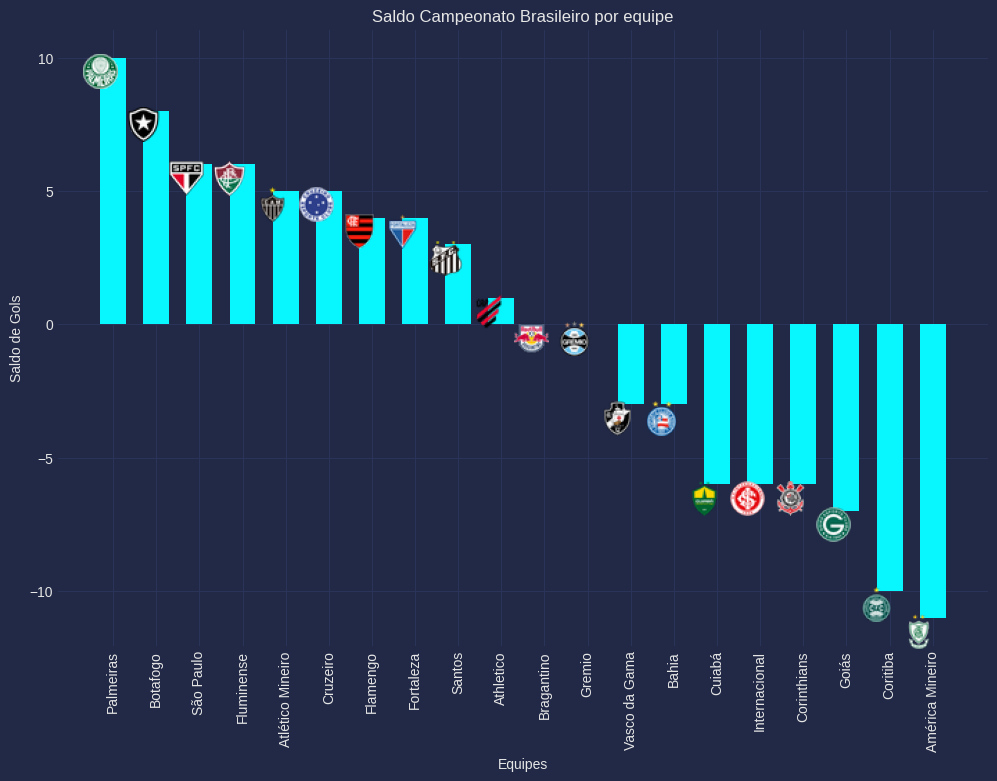

In [40]:
#Definir o tamanho dos brasões dos times
brasao_height = 25  # Altura do brasão (ajuste conforme necessário)
bar_width = 0.6  # Largura das barras (ajuste conforme necessário)
vertical_offset = 5 # Deslocamento vertical das imagens (ajuste conforme necessário)

#Plotar o gráfico de barras com as imagens dos brasões
plt.style.use("cyberpunk")

# Ajustar o tamanho da figura do gráfico
plt.figure(figsize=(12, 8))  # Ajuste os valores de largura e altura conforme necessário

# Gerar o gráfico de barras com os dados das substituições
bars3 = plt.bar(gt.index, gt.values, width=bar_width)

for i, value in enumerate(gt.values):
    img = brasoes[i].resize((brasao_height, brasao_height), Image.ANTIALIAS)  # Redimensionar a imagem para o tamanho desejado
    bar = bars3[i]
    bar_x = bar.get_x()
    bar_y = bar.get_height()
    imagebox = OffsetImage(img, zoom=1)
    ab = AnnotationBbox(imagebox, (bar_x, bar_y), frameon=False, xybox=(0, -10), xycoords='data', boxcoords="offset points", pad=0)
    plt.gca().add_artist(ab)

# Adicionar rótulos aos eixos
plt.xlabel('Equipes')
plt.ylabel('Saldo de Gols')

# Adicionar título ao gráfico
plt.title('Saldo Campeonato Brasileiro por equipe')

# Rotacionar os rótulos dos eixos (opcional)
plt.xticks(rotation=90)  # Ajuste o ângulo de rotação conforme necessário

# Exibir o gráfico
plt.show()